# Use of Adjectives In Reviews

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from nltk import word_tokenize, pos_tag, pos_tag_sents

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction import text
from nltk.corpus import stopwords
from spacy.lang.en.stop_words import STOP_WORDS

pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [2]:
#found code solution from stackoverflow: https://stackoverflow.com/questions/48376580/google-colab-how-to-read-data-from-my-google-drive

from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/My Drive/Datasets/Capstone/

df = pd.read_csv('POS_comments.csv')
df.drop(columns=['Unnamed: 0'], inplace=True)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/Datasets/Capstone


In [3]:
#check data -- noted POSTags column is converting as string, need to make list of tuples for element extraction
df.head(3)

,comments,POSTags
0,i ve stayed with my friend at the midtown cast...,"[('i', 'NN'), ('ve', 'MD'), ('stayed', 'VBN'),..."
1,we ve been staying here for about 9 nights enj...,"[('we', 'PRP'), ('ve', 'VBP'), ('been', 'VBN')..."
2,we had a wonderful stay at jennifer s charming...,"[('we', 'PRP'), ('had', 'VBD'), ('a', 'DT'), (..."


In [4]:
#found ast through stackoverflow: https://stackoverflow.com/questions/48715893/how-to-convert-a-string-of-a-list-of-tuples-to-a-python-list-of-tuples
import ast

POSTags2 = []

for x in df['POSTags']:
  x2 = ast.literal_eval(x)
  POSTags2.append(x2)

In [5]:
#add converted POSTags string into tuple elements
df['POSTags2'] = POSTags2

df.head(3)

,comments,POSTags,POSTags2
0,i ve stayed with my friend at the midtown cast...,"[('i', 'NN'), ('ve', 'MD'), ('stayed', 'VBN'),...","[(i, NN), (ve, MD), (stayed, VBN), (with, IN),..."
1,we ve been staying here for about 9 nights enj...,"[('we', 'PRP'), ('ve', 'VBP'), ('been', 'VBN')...","[(we, PRP), (ve, VBP), (been, VBN), (staying, ..."
2,we had a wonderful stay at jennifer s charming...,"[('we', 'PRP'), ('had', 'VBD'), ('a', 'DT'), (...","[(we, PRP), (had, VBD), (a, DT), (wonderful, J..."


In [6]:
#pull out adjective words if part of speech tags reference adjectives
adj_tags = ['JJR', 'JJS']

adjectives = [y[0] if any(y[-1] in tag for tag in adj_tags) else np.nan for x in df['POSTags2'] for y in x]

adjectives[:5]

[nan, nan, nan, nan, nan]

In [7]:
#list of adjectives to dataframe -- drop all words that are not classified as adjectives
adj = pd.DataFrame(adjectives, columns = ['adjectives'])
adj.dropna(inplace=True)

adj.head(3)

,adjectives
8,midtown
17,lovely
22,big


In [8]:
#remove stopwords from list of adjectives

custom_stop = ['airbnb', 'air bnb', 't', 's', 'air', 'bnb', 'new', 'york', 'new york', 'stay', 'place', 'apartment', 'll', 've', ',']
stop_words = text.ENGLISH_STOP_WORDS.union(custom_stop).union(STOP_WORDS)
adj['adjectives'] = adj['adjectives'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

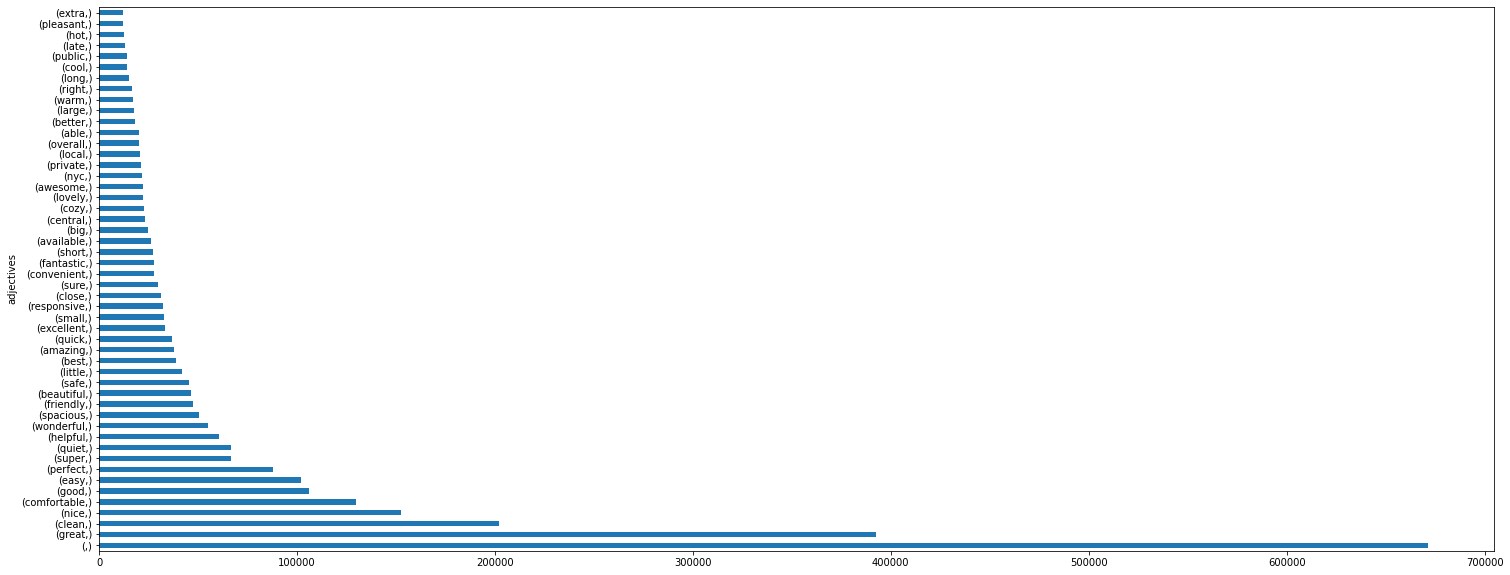

In [9]:
#plot top common adjectives from reviews

adj.value_counts().head(50).plot.barh(figsize=(25,10))

# Observations
- The most notable comparative adjectives are: great, good, nice, super, excellent, best, better, fantastic, perfect, wonderful, beautiful, awesome